Regression Analysis-Using Monthly Returns and Breakeven

In [ ]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

%matplotlib inline
plt.style.use('seaborn')

from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

commodities_be = pd.read_csv('YoY BE.csv') 

commodities_be.head()

,Dates,MSCI World Net Total Return Lo,Bloomberg Commodity Index,S&P GSCI Energy Official Close,S&P GSCI Industrial Metals Off,S&P GSCI Precious Metals Offic,S&P GSCI Agriculture Official,S&P GSCI Gold Official Close I,BE 10 Year
0,31/07/1992,-0.064925,-0.016327,-0.059393,0.079405,-0.052071,-0.095174,-0.058532,0.04498
1,31/08/1992,-0.055170,-0.026623,-0.098150,0.072193,-0.046586,-0.108345,-0.054848,0.04580
2,30/09/1992,-0.059392,-0.022925,-0.084185,0.055673,-0.055118,-0.104402,-0.055402,0.04776
3,30/10/1992,-0.065103,-0.058338,-0.170095,-0.028065,-0.084962,-0.116360,-0.086172,0.04628
4,30/11/1992,0.019024,-0.040959,-0.149014,-0.013030,-0.112264,-0.063870,-0.123416,0.04821


In [ ]:
commodities_be.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Dates                           350 non-null    object 
 1   MSCI World Net Total Return Lo  350 non-null    float64
 2   Bloomberg Commodity Index       350 non-null    float64
 3   S&P GSCI Energy Official Close  350 non-null    float64
 4   S&P GSCI Industrial Metals Off  350 non-null    float64
 5   S&P GSCI Precious Metals Offic  350 non-null    float64
 6   S&P GSCI Agriculture Official   350 non-null    float64
 7   S&P GSCI Gold Official Close I  350 non-null    float64
 8   BE 10 Year                      350 non-null    float64
dtypes: float64(8), object(1)
memory usage: 25.1+ KB


In [ ]:
commodities_be['Dates'] =pd.to_datetime(commodities_be['Dates'])

In [ ]:
commodities_be.columns

Index(['Dates', 'MSCI World Net Total Return Lo', 'Bloomberg Commodity Index',
       'S&P GSCI Energy Official Close', 'S&P GSCI Industrial Metals Off',
       'S&P GSCI Precious Metals Offic', 'S&P GSCI Agriculture Official',
       'S&P GSCI Gold Official Close I', 'BE 10 Year'],
      dtype='object')

In [ ]:
commodities_be.columns = ['Dates', 'MSCI_World', 'Bloomberg_Commodity_Index','Energy', 'Industrial_Metals','Precious_Metals', 'Agriculture','Gold', 'BE']

In [ ]:
commodities_be.set_index('Dates', inplace= True)

Rolling regression result for MSCI_World as target


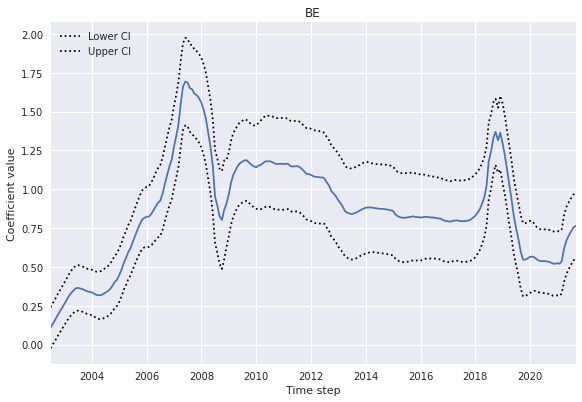

Rolling regression result for Bloomberg_Commodity_Index as target


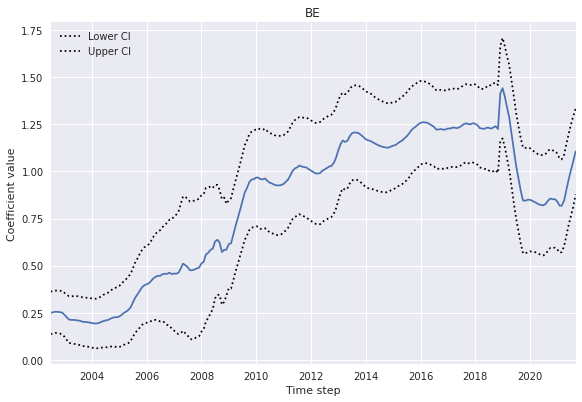

Rolling regression result for Energy as target


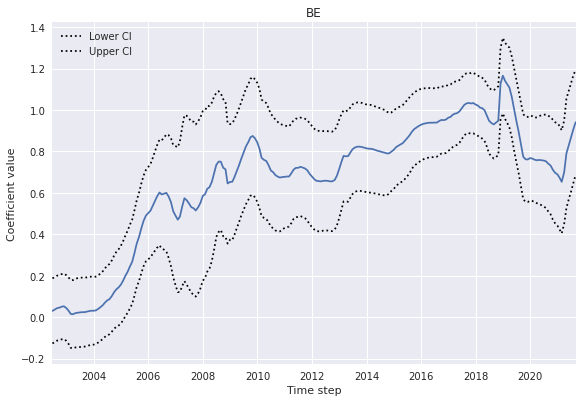

Rolling regression result for Industrial_Metals as target


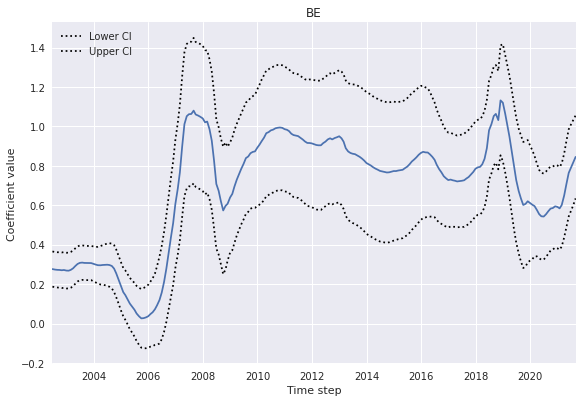

Rolling regression result for Precious_Metals as target


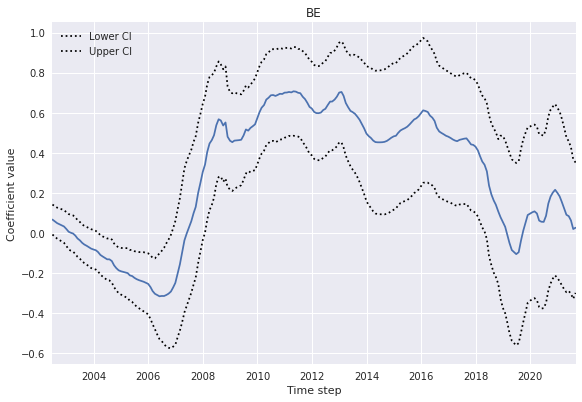

Rolling regression result for Agriculture as target


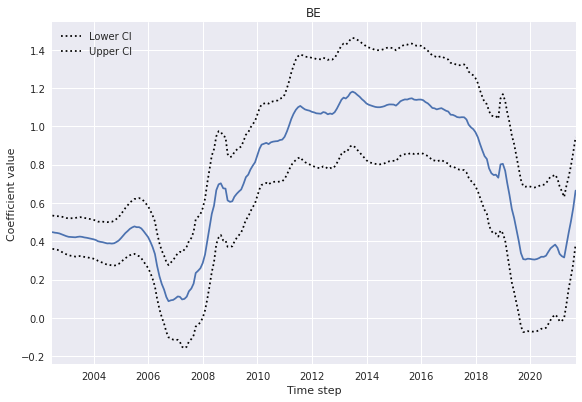

Rolling regression result for Gold as target


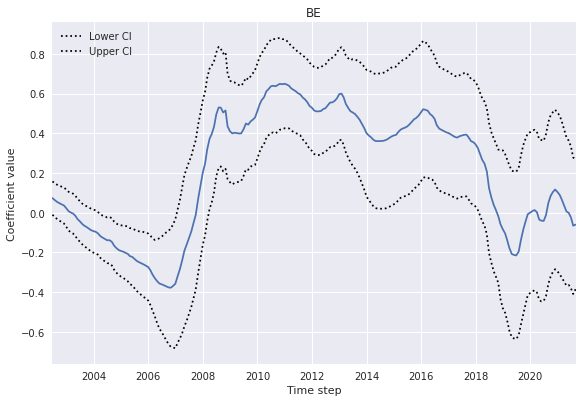

In [ ]:
from statsmodels.regression.rolling import RollingOLS

Sectors = ['MSCI_World', 'Bloomberg_Commodity_Index', 'Energy','Industrial_Metals', 'Precious_Metals', 'Agriculture', 'Gold']

commodities_be_norm=(commodities_be-commodities_be.mean())/commodities_be.std()

for item in Sectors:
    roll_reg = RollingOLS.from_formula(f'{item} ~ BE', window=120, data=commodities_be_norm)
    model = roll_reg.fit()
    print(f'Rolling regression result for {item} as target')

    fig = model.plot_recursive_coefficient(variables=['BE'])
    plt.xlabel('Time step')
    plt.ylabel('Coefficient value')
    plt.show()
   

In [ ]:
commodities_be['BE'].autocorr(lag=1)

0.9579002955297543

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

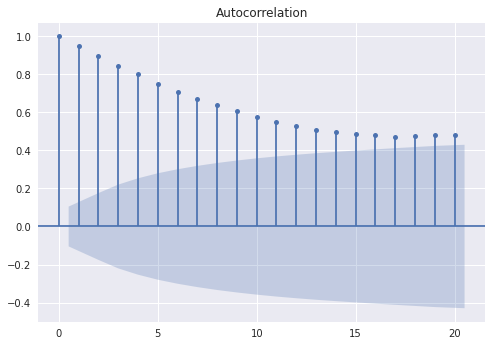

In [ ]:
sm.graphics.tsa.plot_acf(commodities_be['BE'].dropna(), lags=20)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b9fd396c-9c1e-4ca6-8dc8-2011fa1e8fc7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>